In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def GramSchmidt(first_signal, second_signal):

    # Calculate phi-1
    phi_1 = [first_signal[i] / np.linalg.norm(first_signal) for i in range(len(first_signal))]
    
    # Calculate S21
    proj_s2_phi_1 = sum([second_signal[i] * phi_1[i] for i in range(len(second_signal))])
    g2 = [second_signal[i] - proj_s2_phi_1 * phi_1[i] for i in range(len(second_signal))]

    # Calculate phi-2
    if np.linalg.norm(g2) == 0:     # to avoid division by zero
        phi_2 = [0 for i in range(len(g2))]
    else:
        phi_2 = [g2[i] / np.linalg.norm(g2) for i in range(len(g2))]

    return phi_1, phi_2

In [3]:
def SignalSpace(signal, phi_1, phi_2):
    v1 = np.dot(signal, phi_1)
    v2 = np.dot(signal, phi_2)
    return v1, v2

In [68]:
def AddAWGN(signal, SNR_db, num_samples):
    noise = np.random.normal(0, np.sqrt(1 / 10 ** (SNR_db / 10) ), (num_samples, len(s)))
    noisy = np.tile(s, (num_samples, 1)) + noise
    return noisy

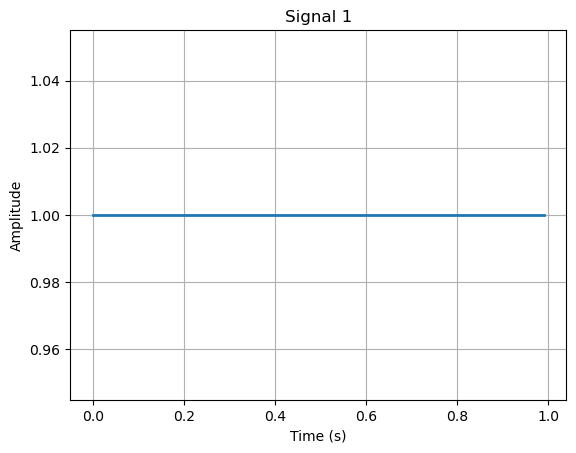

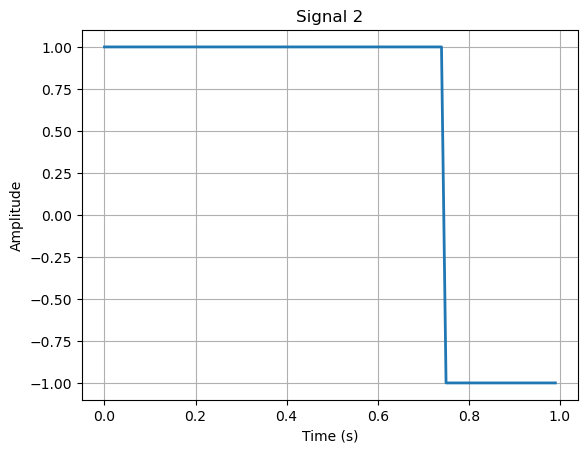

In [77]:
# Create time vector
Fs = 100  # Sample rate
time_vector = np.arange(0, 1, 1/Fs)

# Create signal s1
first_signal = np.ones_like(time_vector)
first_signal[time_vector > 1] = 0

# Create signal s2
second_signal = np.ones_like(time_vector)
second_signal[time_vector >= 0.75] = -1


# Plot the signal 1
fig, ax = plt.subplots()
plt.grid(True)
ax.plot(time_vector, first_signal, linewidth=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Signal 1')
plt.show()

# Plot the signal 2
fig, ax = plt.subplots()
plt.grid(True)
ax.plot(time_vector, second_signal, linewidth=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Signal 2')
plt.show()

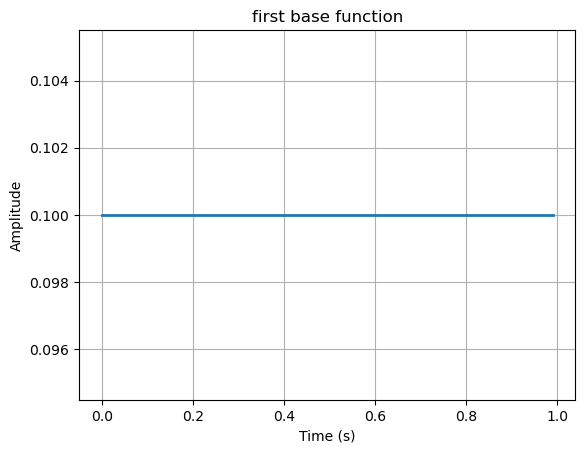

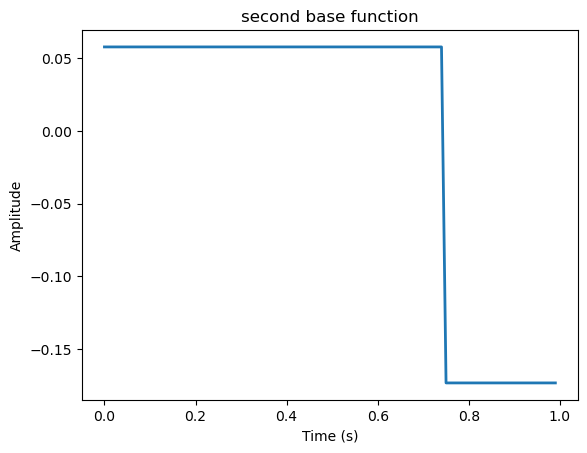

In [78]:
phi_1, phi_2 = GramSchmidt(first_signal, second_signal)

# plotting the bases
fig, ax = plt.subplots()
ax.plot(time_vector, phi_1, linewidth=2)
plt.grid(True)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('first base function')
plt.show()

fig, ax = plt.subplots()
ax.plot(time_vector, phi_2, linewidth=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('second base function')
plt.show()


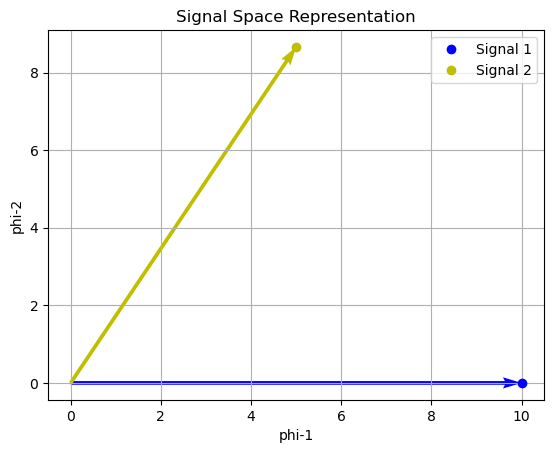

In [79]:
x1, y1 = SignalSpace(first_signal, phi_1, phi_2)
x2, y2 = SignalSpace(second_signal, phi_1, phi_2)


fig, ax = plt.subplots()
plt.grid(True)

ax.plot(x1, y1, 'bo', label='Signal 1', linewidth=2)
ax.plot(x2, y2, 'yo', label='Signal 2', linewidth=2)
ax.quiver(0, 0, x1, y1, angles='xy', scale_units='xy', scale=1, color=['b', 'r'])
ax.quiver(0, 0, x2, y2, angles='xy', scale_units='xy', scale=1, color=['y', 'y'])
ax.set_xlabel('phi-1')
ax.set_ylabel('phi-2')
ax.set_title('Signal Space Representation')
ax.legend()
plt.show()
   

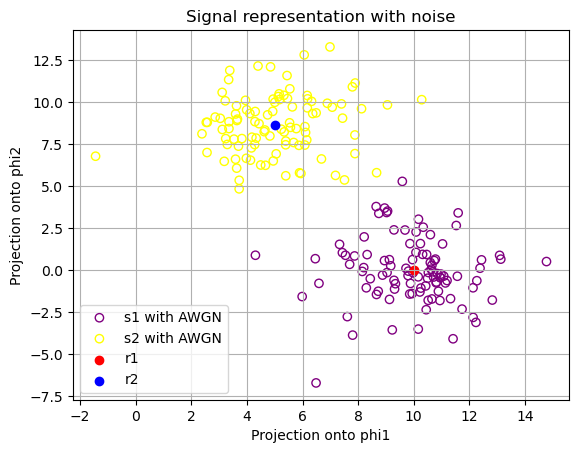

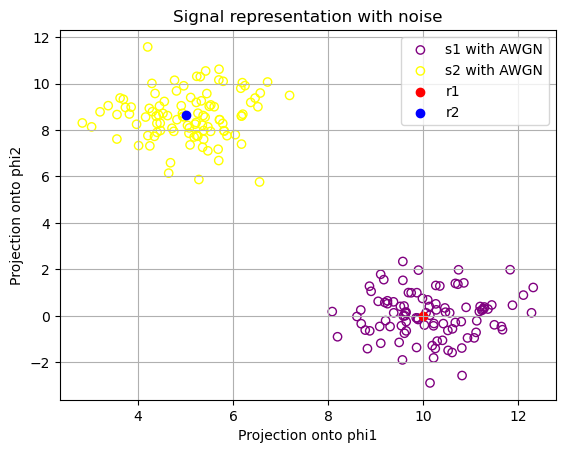

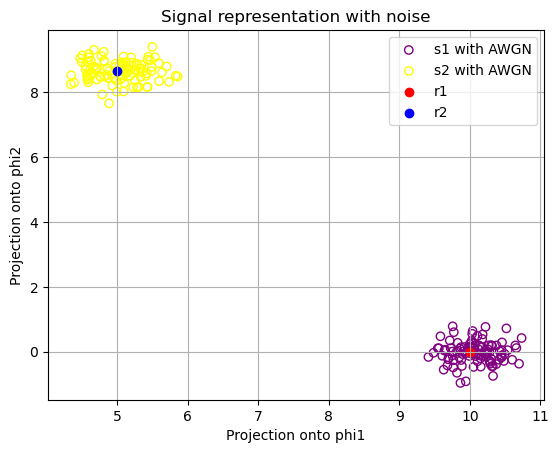

In [80]:
num_samples = 100
sigma_values = [-5, 0, 10]  # in dB

x1, y1 = SignalSpace(first_signal, phi_1, phi_2)
x2, y2 = SignalSpace(second_signal, phi_1, phi_2)

for sigma_dB in sigma_values:

    # add noise
    r1 = AddAWGN(first_signal, sigma_dB, num_samples)
    r2 = AddAWGN(second_signal, sigma_dB, num_samples)
    
    # Calculate the signal space representation of the noisy signals
    v11, v12 = SignalSpace(r1, phi_1, phi_2)
    v21, v22 = SignalSpace(r2, phi_1, phi_2)

    # Plot the signal points of the generated samples
    plt.figure()
    plt.grid(True)
    plt.scatter(x1, y1, label='r1', color='r')
    plt.scatter(x2, y2, label='r2', color='b')
    plt.scatter(v11, v12, label='s1 with AWGN',facecolors='none', edgecolors='purple')
    plt.scatter(v21, v22, label='s2 with AWGN',facecolors='none', edgecolors='yellow')
   
    plt.xlabel('Projection onto phi1')
    plt.ylabel('Projection onto phi2')
    plt.title(f'Signal representation with noise')
    plt.legend()

plt.show()

